![](https://d3kqdc25i4tl0t.cloudfront.net/articles/content/_340594_resumeanatomy.hero.jpg)

## Importing Requied Libraries (Nhập các thư viện cần thiết)
---
---

In [ ]:
import numpy as np # để import thư viện numpy và rút gọn tên thư viện là np
# numpy là thư viện số học và mảng trong python, cung cấp cấu trúc dữ liệu và các hàm để thực hiện các phép toán số học,đại số tuyến tính, phân tích số và các phép toán trên mảng nhiều chiều.

import pandas as pd # để import thư viện pandas và rút gọn tên thư viện là pd
# là thư viện xử lý và phân tích dữ liệu trong python, cung cấp các đối tượng và các hàm để thực hiện các thao tác liên quan đến dữ liệu, ví dụ như đọc và ghi dữ liệu, thống kê và tổng hợp dữ liệu.

import matplotlib.pyplot as plt #để import module pyplot từ thư viện matplotlib dưới tên là  plt (dùng để tạo biểu đồ và trực quan hóa)
#matplotlib cung cấp các đối tượng và các hàm để vẽ đồ thị và biểu đồ, được sử dụng để phân tích dữ liệu và trực quan hóa.

import seaborn as sns #để import thư viện seaborn và rút gọn tên thư viện là sns
# là thư viện tạo style cho các biểu đồ trong matplotlib

sns.set_style('darkgrid') # dùng thư viện seaborn để tạo kiểu cho các biểu đồ trong matplotlib ( darkgrid là phông chữ nền tối với các đường lưới)
import warnings 
warnings.filterwarnings('ignore') #dùng module warning của python để tắt thông báo cảnh báo trong code (tức là những thông báo cảnh báo người lập trình về các vấn đề trong code - có thể xảy ra của code)

import re #dùng module re của python để cung cấp hỗ trợ cho các biểu thức chính quy (công cụ tìm kiếm và xử lý văn bản)


from sklearn.preprocessing import LabelEncoder #dùng các module và các chức năng khác nhau từ thư viện sklearn( thư viện này là một thư viện trong lĩnh vực mechine learning)
#sklearn cung cấp module và các hàm để thực hiện các tác vụ như phân loại, hồi quy, phân cụm,...
#LabelEncoder để chuyển đổi các nhãn văn bản thành các giá trị số nguyên . 

from sklearn.model_selection import train_test_split #train_test_split để chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.

from sklearn.feature_extraction.text import TfidfVectorizer #để chuyển đổi các văn bản thành các vecto TF-IDF

from scipy.sparse import hstack #hstack để ghép các ma trận dày đặc(sparse-matrix) theo chiều ngang (horizontally)

from sklearn.multiclass import OneVsRestClassifier #OneVsRestClassifier được sử dụng để huấn luyện mô hình phân loại đa lớp dựa trên phương pháp One-Vs-The-Rest

from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier là bộ phân loại hàng sóng gần nhất(K-NN-CLASSIFIER)

from sklearn import metrics #metrics chứa các hàm tính toán các chỉ số đánh giá mô hình chẳng hạn như độ chính xác F1-score

## Loading Dataset(tải file dữ liệu)
---
---

In [6]:

df = pd.read_csv('UpdatedResumeDataSet.csv') #đọc file .csv
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


Đoạn code trên được viết bằng ngôn ngữ Python và sử dụng thư viện Pandas (được import với alias là 'pd') để đọc và xử lý dữ liệu từ một tệp tin CSV ('UpdatedResumeDataSet.csv').

Dòng đầu tiên làm nhiệm vụ đọc dữ liệu từ tệp CSV và lưu nó vào một biến gọi là 'df' (được khởi tạo là một đối tượng của lớp DataFrame trong Pandas). 'df' có thể được sử dụng để thực hiện các thao tác phân tích dữ liệu trên các dữ liệu trong tệp CSV đã cho.

Dòng thứ hai: làm nhiệm vụ hiển thị một số mẫu dữ liệu đầu tiên trong 'df', sử dụng phương thức 'head()' của lớp DataFrame. Theo mặc định, phương thức này sẽ hiển thị 5 dòng đầu tiên của 'df', tuy nhiên số lượng dòng có thể được chỉ định theo ý muốn (ví dụ: 'df.head(10)' sẽ hiển thị 10 dòng đầu tiên).


## Exploratory Data Analysis( Vẽ biểu đồ thống kê)
---
---

In [5]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


Đoạn code trên có nhiệm vụ tính số lượng các mục trong cột 'Category' trong DataFrame 'df', sau đó lưu trữ kết quả vào biến 'category'.

Cụ thể, code sẽ thực hiện các bước sau:

'df['Category'].value_counts()' sẽ đếm số lượng các giá trị xuất hiện trong cột 'Category' và trả về một Series chứa số lần xuất hiện của mỗi giá trị.

'.reset_index()' được sử dụng để đặt lại chỉ số của Series 'value_counts' về dạng một DataFrame và thêm một cột mới là 'index' để lưu giá trị của 'Category'.

Cuối cùng, kết quả sẽ được gán cho biến 'category', nó chứa một DataFrame với hai cột 'Category' và 'value_counts', trong đó 'Category' là tên của từng loại trong cột 'Category', 'value_counts' là số lượng của từng loại đó.

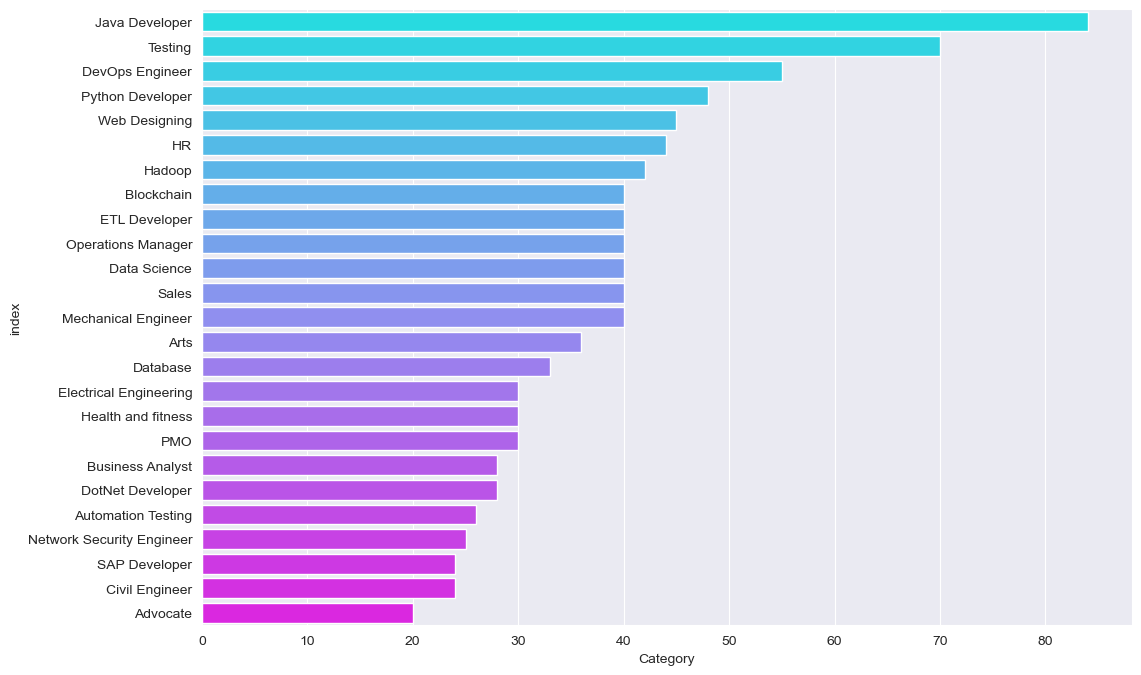

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()


Đoạn code này sử dụng các thư viện Matplotlib và Seaborn trong Python để tạo một biểu đồ cột (bar chart) dựa trên dữ liệu được lưu trữ trong DataFrame category.

Cụ thể:

plt.figure(figsize=(12,8)) tạo một hình ảnh mới với kích thước 12x8 inch. plt ở đây là viết tắt của pyplot trong Matplotlib.

sns.barplot(x=category['Category'], y=category['index'], palette='cool') sử dụng hàm barplot() trong Seaborn để tạo biểu đồ cột. x và y đại diện cho trục x và trục y của biểu đồ, lần lượt là các giá trị của cột 'Category' và 'index' trong DataFrame category. palette là một đối số tùy chọn được sử dụng để thiết lập màu sắc cho biểu đồ.

plt.show() hiển thị biểu đồ được tạo ra.

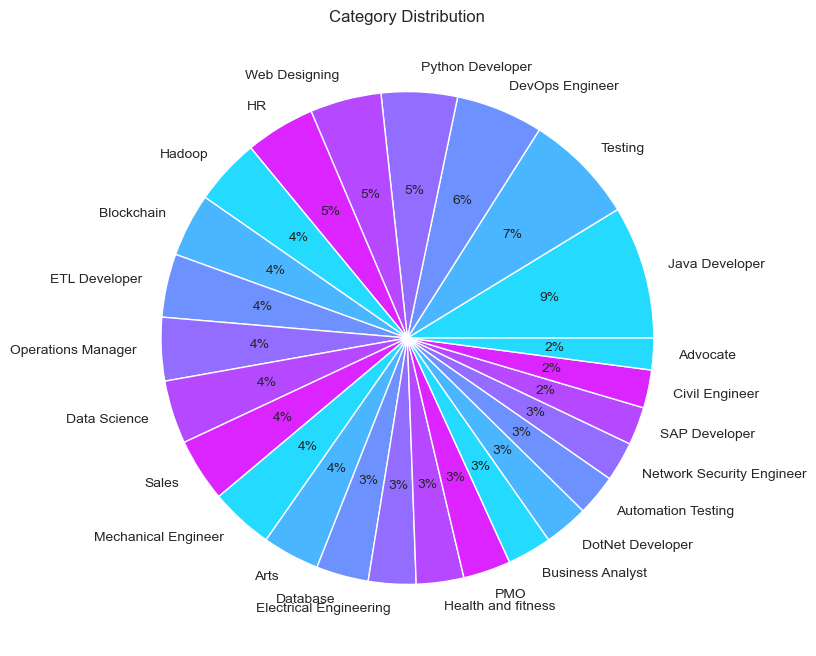

In [7]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

Đoạn code này sử dụng thư viện Matplotlib và Seaborn để tạo một biểu đồ tròn (pie chart) dựa trên dữ liệu được lưu trữ trong DataFrame category.

Cụ thể:

plt.figure(figsize=(12,8)) tạo một hình ảnh mới với kích thước 12x8 inch.

plt.pie(category['Category'], labels=category['index'], colors=sns.color_palette('cool'), autopct='%.0f%%') sử dụng hàm pie() trong Matplotlib để tạo biểu đồ tròn. category['Category'] là một mảng giá trị số được sử dụng để vẽ biểu đồ. labels đại diện cho các nhãn của các phần tử trong biểu đồ. colors là một đối số tùy chọn được sử dụng để thiết lập màu sắc cho các phần tử trong biểu đồ. autopct là một đối số tùy chọn để hiển thị tỷ lệ phần trăm của mỗi phần tử trong biểu đồ.

plt.title('Category Distribution') đặt tiêu đề cho biểu đồ tròn.

plt.show() hiển thị biểu đồ được tạo ra.

## Data Cleaning (loại bỏ những dữ liệu không cần thiết, lưu vào cột cleaned)
---
---

In [9]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

Đoạn code này định nghĩa một hàm cleanResume() để làm sạch văn bản của một bản CV (resume). Hàm này sử dụng thư viện re để thực hiện các thao tác xử lý văn bản.

Cụ thể:

resumeText = re.sub('http\S+\s*', ' ', resumeText) sử dụng hàm sub() trong re để loại bỏ các URL trong văn bản và thay thế chúng bằng khoảng trắng.

resumeText = re.sub('RT|cc', ' ', resumeText) sử dụng hàm sub() để loại bỏ các từ viết tắt RT và cc trong văn bản và thay thế chúng bằng khoảng trắng.

resumeText = re.sub('#\S+', '', resumeText) sử dụng hàm sub() để loại bỏ các hashtag trong văn bản và thay thế chúng bằng khoảng trắng.

resumeText = re.sub('@\S+', ' ', resumeText) sử dụng hàm sub() để loại bỏ các mentions trong văn bản và thay thế chúng bằng khoảng trắng.

resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""), ' ', resumeText)sử dụng hàmsub()` để loại bỏ các dấu câu trong văn bản và thay thế chúng bằng khoảng trắng.

resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) sử dụng hàm sub() để loại bỏ các ký tự không phải ASCII trong văn bản và thay thế chúng bằng khoảng trắng.

resumeText = re.sub('\s+', ' ', resumeText) sử dụng hàm sub() để loại bỏ các khoảng trắng thừa trong văn bản và thay thế chúng bằng khoảng trắng đơn.

Cuối cùng, hàm trả về văn bản đã được làm sạch.

In [10]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Đoạn mã này có chức năng là thêm một cột mới vào dataframe df với tên là "cleaned". Cột mới này được tạo ra bằng cách áp dụng hàm cleanResume() cho mỗi giá trị của cột "Resume" trong df.

Hàm cleanResume() có thể được định nghĩa trước đó trong mã. Nó được áp dụng để làm sạch các ký tự không mong muốn hoặc các định dạng không hợp lệ trong cột "Resume".

Sử dụng hàm apply() trên cột "Resume" giúp áp dụng hàm cleanResume() cho mỗi giá trị trong cột đó và trả về kết quả tương ứng. Kết quả này được lưu trữ trong cột "cleaned" của dataframe df.

Cuối cùng, hàm head() được sử dụng để hiển thị 5 hàng đầu tiên của dataframe df kèm với cột "cleaned" mới được thêm vào

## Encoding (mã hóa kiểu dữ liệu ký tự thành số)
---
---

In [12]:
label = LabelEncoder()
df['Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Mã trên sử dụng LabelEncoder trong thư viện sklearn.preprocessing để mã hóa các giá trị của cột "Category" trong DataFrame df thành các giá trị số nguyên duy nhất.

LabelEncoder được sử dụng để biến đổi các giá trị chuỗi thành các giá trị số để thuận tiện cho việc huấn luyện mô hình học máy. Các giá trị chuỗi sẽ được gán một giá trị số duy nhất tương ứng với chúng trong phạm vi từ 0 đến (số lượng giá trị khác nhau - 1).

Đầu tiên, chúng ta khởi tạo đối tượng LabelEncoder trong biến "label". Sau đó, phương thức fit_transform() được sử dụng để mã hóa giá trị của cột "Category" trong DataFrame df. Mã hóa này sẽ được lưu trữ trong cột "Category" của DataFrame df.

Cuối cùng, phương thức head() được sử dụng để hiển thị năm hàng đầu tiên của DataFrame df đã được mã hóa.

In [13]:
text = df['cleaned'].values
target = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

Đoạn mã này có chức năng là thêm một cột mới vào dataframe df với tên là "cleaned". Cột mới này được tạo ra bằng cách áp dụng hàm cleanResume() cho mỗi giá trị của cột "Resume" trong df.

Hàm cleanResume() có thể được định nghĩa trước đó trong mã. Nó được áp dụng để làm sạch các ký tự không mong muốn hoặc các định dạng không hợp lệ trong cột "Resume".

Sử dụng hàm apply() trên cột "Resume" giúp áp dụng hàm cleanResume() cho mỗi giá trị trong cột đó và trả về kết quả tương ứng. Kết quả này được lưu trữ trong cột "cleaned" của dataframe df.

Cuối cùng, hàm head() được sử dụng để hiển thị 5 hàng đầu tiên của dataframe df kèm với cột "cleaned" mới được thêm vào.
Lương
Trần Lương
Đoạn code này có nhiệm vụ sử dụng mô hình TF-IDF để chuyển đổi dữ liệu văn bản vào các đặc trưng có thể sử dụng cho việc huấn luyện một mô hình phân loại. Dưới đây là chi tiết của từng câu lệnh:

text = df['cleaned'].values: Lấy nội dung trong cột 'cleaned' của DataFrame df và lưu vào biến text. Giả định rằng df chứa dữ liệu văn bản được chuẩn hóa, sẵn sàng để được sử dụng trong việc huấn luyện mô hình phân loại.

target = df['Category'].values: Lấy nhãn của mỗi mẫu dữ liệu trong cột 'Category' của DataFrame df và lưu vào biến target. Giả định rằng df chứa nhãn của mỗi mẫu dữ liệu.

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500): Khởi tạo một đối tượng TfidfVectorizer với các tham số được cấu hình như sau:

sublinear_tf=True: Sử dụng trọng số dựa trên một hàm logarit để giảm thiểu tác động của các từ có tần suất cao.
stop_words='english': Loại bỏ các từ không cần thiết bằng cách sử dụng danh sách các từ dừng tiếng Anh được xây dựng sẵn.
max_features=1500: Giới hạn số lượng từ vựng tối đa được sử dụng trong quá trình biểu diễn văn bản.
word_vectorizer.fit(text): Tiến hành khớp mô hình TF-IDF trên text (nội dung của cột 'cleaned' của DataFrame df) để tạo bộ từ vựng cho mô hình.

WordFeatures = word_vectorizer.transform(text): Sử dụng mô hình TF-IDF đã được khởi tạo và khớp trên text để chuyển đổi text thành một ma trận thưa (sparse matrix) biểu diễn các đặc trưng của các từ trong văn bản. Kết quả được lưu vào biến WordFeatures.

## Train-Test Split (chia dữ liệu huấn luyện và kiểm tra theo tỷ lệ 80% 20%)
---
---

In [15]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

Đoạn code này sử dụng hàm train_test_split trong module sklearn.model_selection để chia tách dữ liệu thành 2 phần là tập huấn luyện (training set) và tập kiểm tra (test set). Cụ thể:

WordFeatures: Là ma trận thưa biểu diễn các đặc trưng của các từ trong văn bản sau khi được xử lý bằng mô hình TF-IDF, được khởi tạo và biến đổi từ đoạn code trước.

target: Là mảng 1 chiều chứa các nhãn của mỗi mẫu dữ liệu trong DataFrame, được khởi tạo và gán trong đoạn code trước.

random_state=24: Là giá trị được sử dụng để đảm bảo tính ngẫu nhiên trong quá trình chia tập dữ liệu. Với cùng một giá trị random_state, các lần chạy của chương trình sẽ cho kết quả chia tập dữ liệu giống nhau.

test_size=0.2: Tỷ lệ phần trăm dữ liệu được dùng cho tập kiểm tra. Trong trường hợp này, dữ liệu sẽ được chia thành 2 phần, với tập kiểm tra chiếm 20% tổng số mẫu dữ liệu.

X_train, X_test, y_train, y_test: Là 4 biến được gán giá trị trong quá trình chia tập dữ liệu, lần lượt là tập huấn luyện của các đặc trưng (WordFeatures) và nhãn (target), tập kiểm tra của các đặc trưng (WordFeatures) và nhãn (target). Giá trị của 4 biến này sẽ được sử dụng để huấn luyện và đánh giá mô hình phân loại.

## Model Training
---
---

In [18]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

Đoạn code trên sử dụng OneVsRestClassifier để xây dựng một bộ phân loại nhiều lớp (multi-class classification) dựa trên KNeighborsClassifier.

OneVsRestClassifier được sử dụng để xây dựng một bộ phân loại đa lớp (multi-class classifier) từ một bộ phân loại nhị phân (binary classifier). Nó sử dụng chiến lược "một đối tượng là một lớp" (one-vs-rest) để phân loại dữ liệu trong mỗi lớp. Theo chiến lược này, mỗi lớp sẽ được xem như một lớp tích cực (positive class), còn các lớp còn lại sẽ được xem như một lớp tiêu cực (negative class).

KNeighborsClassifier() là một bộ phân loại đơn giản dựa trên thuật toán K-nearest neighbors. KNN là một phương pháp dựa trên việc so sánh khoảng cách giữa các điểm dữ liệu để phân loại.

model.fit(X_train, y_train) sử dụng dữ liệu huấn luyện (X_train, y_train) để huấn luyện bộ phân loại. Khi huấn luyện, bộ phân loại sẽ học cách phân loại các mẫu dữ liệu vào từng lớp dựa trên đặc trưng của chúng.

Kết quả của quá trình huấn luyện sẽ được lưu trữ trong biến model và được sử dụng để phân loại các mẫu dữ liệu mới trong quá trình kiểm tra.

## Prediction (đưa ra dự đoán cho dữ liệu kiểm tra)
---
---

In [19]:
y_pred = model.predict(X_test)

Đoạn code trên sử dụng mô hình phân loại đã huấn luyện để dự đoán nhãn của các mẫu dữ liệu trong tập kiểm tra.

model là một mô hình phân loại đã được huấn luyện trên dữ liệu huấn luyện.

X_test là ma trận thưa biểu diễn các đặc trưng của các mẫu dữ liệu trong tập kiểm tra.

model.predict(X_test) sử dụng ma trận đặc trưng X_test để dự đoán nhãn của các mẫu dữ liệu trong tập kiểm tra. Kết quả của quá trình này là một mảng chứa các nhãn được dự đoán bởi mô hình.

Kết quả dự đoán được lưu trữ trong biến y_pred, và sẽ được sử dụng để so sánh với nhãn thực tế của các mẫu dữ liệu trong tập kiểm tra để đánh giá hiệu quả của mô hình phân loại.


In [20]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


Đoạn code trên được sử dụng để tính và in ra độ chính xác của mô hình phân loại trên tập huấn luyện và tập kiểm tra.

model.score(X_train, y_train) tính độ chính xác của mô hình trên tập huấn luyện. X_train là ma trận đặc trưng của các mẫu dữ liệu trong tập huấn luyện, y_train là mảng chứa nhãn thực tế của các mẫu dữ liệu tương ứng. Kết quả là một giá trị trong khoảng từ 0 đến 1, cho biết tỉ lệ các mẫu dữ liệu trong tập huấn luyện được phân loại đúng.

(model.score(X_train, y_train)*100).round(2) định dạng và làm tròn độ chính xác tính được trên tập huấn luyện thành một số dấu thập phân có hai chữ số sau dấu phẩy, và chuyển đổi kết quả sang đơn vị phần trăm.

Tương tự, model.score(X_test, y_test) tính độ chính xác của mô hình trên tập kiểm tra. X_test là ma trận đặc trưng của các mẫu dữ liệu trong tập kiểm tra, y_test là mảng chứa nhãn thực tế của các mẫu dữ liệu tương ứng.

Các câu lệnh print sử dụng định dạng f-string để in ra kết quả tính được. Các dấu --- được sử dụng để tạo ra các dòng gạch ngang để tạo ra cấu trúc cho đoạn kết quả in ra.